In [1]:
#  test_bess - Program to test the bess function

# Set up configuration options and special features
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def bess(m_max,x) :
    # Bessel function
    # Inputs
    #    m_max = Largest desired order
    #    x = Value at which Bessel function J(x) is evaluated
    # Output
    #    jj = Vector of J(x) for all orders <= m_max

    #* Perform downward recursion from initial guess
    eps = 1.0e-15
    m_top = max(m_max,x)+15             # Top value of m for recursion
    m_top = int(2*ceil( m_top/2 ))      # Round up to an even number
    j = empty(m_top+1)
    j[m_top] = 0.
    j[m_top-1] = 1.
    for m in reversed(range(m_top-1)) :  # Downward recursion
        j[m] = 2.*(m+1)/(x+eps)*j[m+1] - j[m+2]

    #* Normalize using identity and return requested values
    norm = j[0]         
    for m in range(2,m_top,2) :
        norm = norm + 2*j[m]
    
    jj = empty(m_max+1)          # Send back only the values for
    for m in range(m_max+1) :    # m=0,...,m_max and discard values
        jj[m] = j[m]/norm        # for m=m_max+1,...,m_top
                                 
    return jj

Enter m: 3


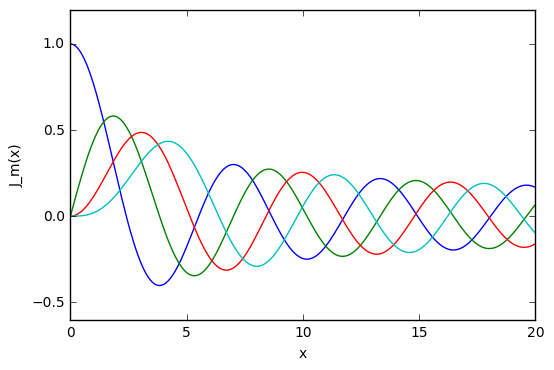

In [3]:
nplot = 200
m = input("Enter m: ")
x = linspace(0.,20.,nplot)

jj = empty((nplot,m+1))
for i in range(nplot) :
    jj[i,:] = bess(m,x[i])

for mi in range(m+1) :
    plot(x,jj[:,mi],'-')
    xlabel('x'); ylabel('J_m(x)')